In [1]:
# pipenv install scikit-learn scipy pandas matplotlib statsmodel fastapi uvicorn pydantic pingouin seaborn ipykernel

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carga dos dados

In [3]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
# Checar estrutura do Dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
# Visualizar topo do dataframe
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [6]:
# Visualizar final do dataframe
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [7]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

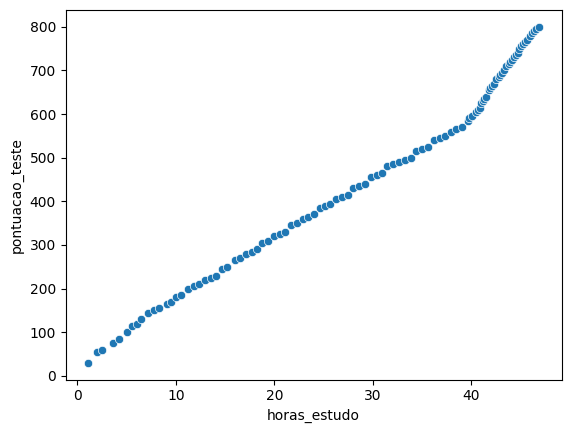

In [8]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='pontuacao_teste'>

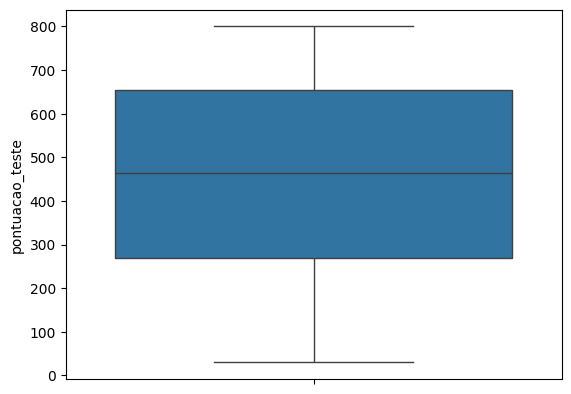

In [9]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao,y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

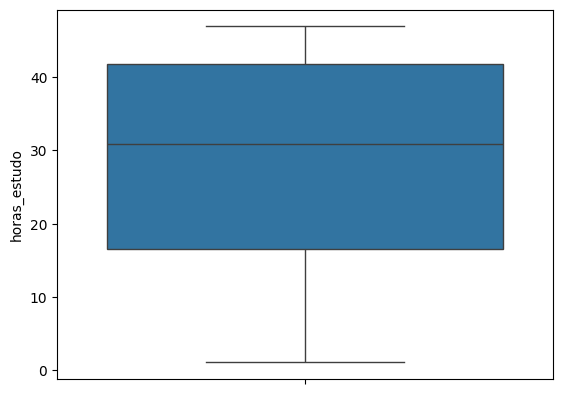

In [10]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao,y='horas_estudo')

<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

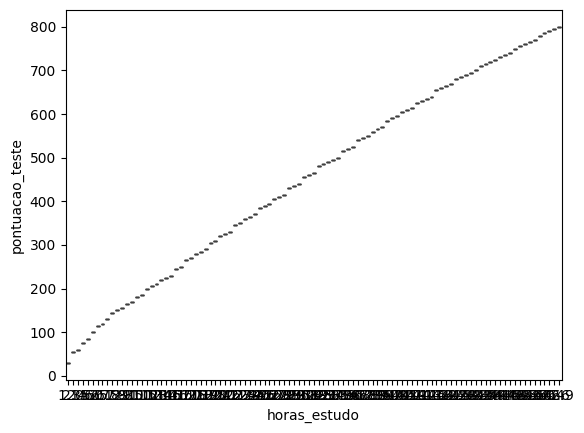

In [11]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao,y='pontuacao_teste', x='horas_estudo')

<Axes: >

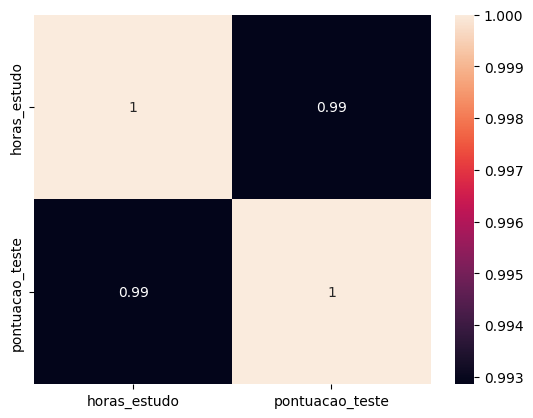

In [12]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

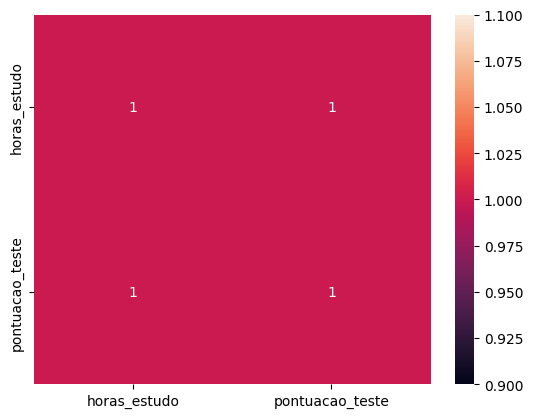

In [13]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

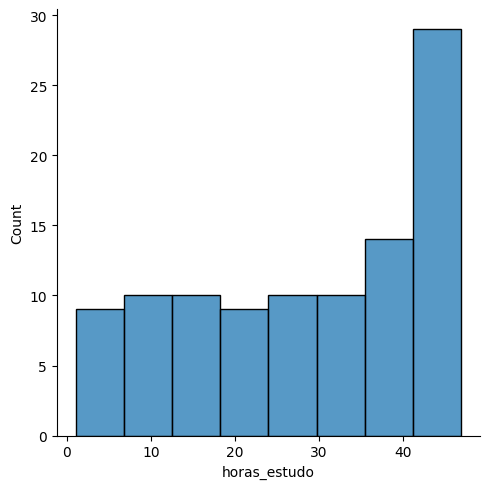

In [14]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo')

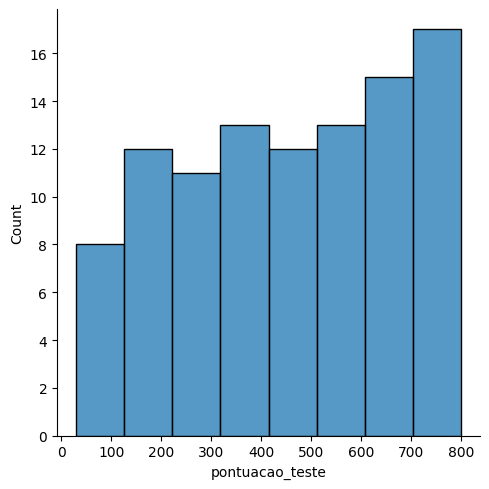

In [15]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste')

## TREINAMENTO DO MODELO

In [21]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature (uma variável independendente),
# precisamos ajudar o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=50)

In [22]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [23]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Imprimir a equação da reta
# y - aX + b
print("A equação da reta é y= {:4f}x + {:4f}".format(reg_model.coef_[0][0],
                                                     reg_model.intercept_[0]))

A equação da reta é y= 15.642619x + 8.476601
